# Importing and Preprocessing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [60]:
input_df = pd.read_csv('input.csv')
input_df

,S_N0\t\t\t\t,USER_LATITUDE,USER_LONGITUDE,USER_LOCATION,STATION NAME,OUTPUT_LATITUDE,OUTPUT_LONGITUDE,STATION_LOCATION,Distance
0,1,19.47322,-158.188133,"(19.47322, -158.188133)",Four Seasons Hotel at Manele Bay,20.742360,-156.896730,"(20.74236, -156.89673)",194.8787272231647 km
1,2,19.47370,-155.190972,"(19.4737, -155.190972)",University of Hawaii at Hilo,19.701270,-155.079250,"(19.70127, -155.07925)",27.785276904292083 km
2,3,19.47461,-159.506507,"(19.474610000000002, -159.506507)",Marriott's Ko Olina Beach Club,21.331140,-158.121542,"(21.331139999999998, -158.121542)",251.27625744908588 km
3,4,19.47486,-158.045578,"(19.47486, -158.045578)",Four Seasons Hotel at Manele Bay,20.742360,-156.896730,"(20.74236, -156.89673)",184.72279122321467 km
4,5,19.47534,-157.727702,"(19.47534, -157.727702)",Four Seasons Hotel at Manele Bay,20.742360,-156.896730,"(20.74236, -156.89673)",165.00183903441874 km
...,...,...,...,...,...,...,...,...,...
1995,1996,22.11986,-157.237955,"(22.11986, -157.237955)",Laie Village Center,21.646735,-157.921769,"(21.6467349, -157.9217687)",87.96996347290407 km
1996,1997,22.12060,-157.167345,"(22.1206, -157.16734499999998)",Laie Village Center,21.646735,-157.921769,"(21.6467349, -157.9217687)",93.97822827664666 km
1997,1998,22.12087,-159.516637,"(22.12087, -159.516637)",Princeville Shopping Center,22.213596,-159.474318,"(22.2135956, -159.4743178)",11.156981319025856 km
1998,1999,22.12183,-158.802364,"(22.12183, -158.80236399999998)",Lihue Airport,21.977830,-159.348750,"(21.977829999999997, -159.34875)",58.611837417614474 km


In [5]:
X = input_df.iloc[0:,1:3]

In [6]:
y = input_df.iloc[0:,7]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

# Support Vector Machine

In [9]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',degree=30)
svclassifier.fit(X_train, y_train)

SVC(degree=30, kernel='poly')

In [10]:
y_pred = svclassifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
class_rep = classification_report(y_test,y_pred)
print(con_mat)
print(class_rep)

[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]
                                           precision    recall  f1-score   support

(19.571679999999997, -155.96201000000002)       1.00      0.75      0.86         4
                   (19.60924, -155.96445)       0.50      1.00      0.67         1
                   (19.64405, -156.00273)       0.00      0.00      0.00         2
         (19.645467, -155.99028700000002)       0.00      0.00      0.00         0
                   (19.67427, -156.01439)       0.25      1.00      0.40         1
                   (19.70127, -155.07925)       1.00      1.00      1.00        10
          (19.71101, -155.07706000000002)       1.00      1.00      1.00         1
         (19.726370000000003, -155.05767)       1.00      1.00      1.00         3
               (19.7393796, -156.0410098)       1.00      1.00      1.00        19
        (19.8271119, -155.99137580000001)       1

c:\users\chanakya\onedrive\documents\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chanakya\onedrive\documents\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
svm_acc = svclassifier.score(X_test,y_test)
svm_acc

0.955

<AxesSubplot:>

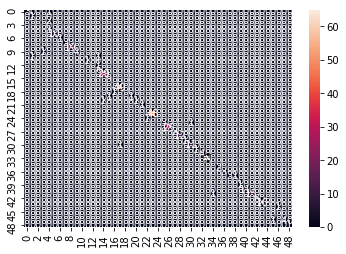

In [13]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [14]:
print(class_rep)


                                           precision    recall  f1-score   support

(19.571679999999997, -155.96201000000002)       1.00      0.75      0.86         4
                   (19.60924, -155.96445)       0.50      1.00      0.67         1
                   (19.64405, -156.00273)       0.00      0.00      0.00         2
         (19.645467, -155.99028700000002)       0.00      0.00      0.00         0
                   (19.67427, -156.01439)       0.25      1.00      0.40         1
                   (19.70127, -155.07925)       1.00      1.00      1.00        10
          (19.71101, -155.07706000000002)       1.00      1.00      1.00         1
         (19.726370000000003, -155.05767)       1.00      1.00      1.00         3
               (19.7393796, -156.0410098)       1.00      1.00      1.00        19
        (19.8271119, -155.99137580000001)       1.00      0.80      0.89         5
          (19.916420000000002, -155.8822)       0.00      0.00      0.00         2
   

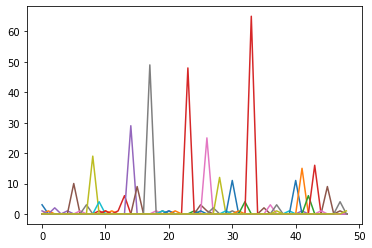

In [15]:
plt.plot(con_mat)

ValueError: The number of FixedLocator locations (49), usually from a call to set_ticks, does not match the number of ticklabels (73).

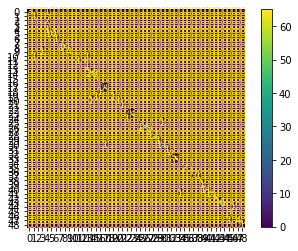

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier,X_test,y_test)

# Decision Tree

In [16]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, dtree_predictions) )
print(classification_report(y_test,dtree_predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                           precision    recall  f1-score   support

(19.571679999999997, -155.96201000000002)       0.00      0.00      0.00         4
                   (19.60924, -155.96445)       0.00      0.00      0.00         1
                   (19.64405, -156.00273)       0.00      0.00      0.00         2
                   (19.67427, -156.01439)       0.00      0.00      0.00         1
                   (19.70127, -155.07925)       0.00      0.00      0.00        10
          (19.71101, -155.07706000000002)       0.00      0.00      0.00         1
         (19.726370000000003, -155.05767)       0.00      0.00      0.00         3
               (19.7393796, -156.0410098)       0.00      0.00      0.00        19
        (19.8271119, -155.99137580000001)       0.00      0.00      0.00         5
          (19.916420000000002, -155.8822)       0

c:\users\chanakya\onedrive\documents\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
dtree_acc = dtree_model.score(X_test,y_test)
dtree_acc

0.4225

<AxesSubplot:>

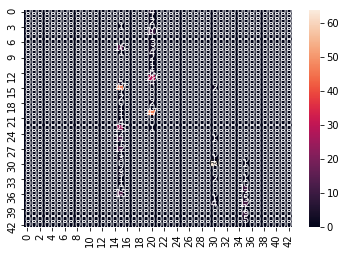

In [19]:
sns.heatmap(confusion_matrix(y_test, dtree_predictions), annot=True)

# KNN Classification

In [20]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  


In [21]:
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, knn_predictions) )
print(classification_report(y_test,knn_predictions))

[[2 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 1 4 0]
 [0 0 0 ... 0 0 0]]
                                           precision    recall  f1-score   support

(19.571679999999997, -155.96201000000002)       1.00      0.50      0.67         4
                   (19.60924, -155.96445)       0.33      1.00      0.50         1
                   (19.64405, -156.00273)       0.00      0.00      0.00         2
                   (19.67427, -156.01439)       0.00      0.00      0.00         1
                   (19.70127, -155.07925)       1.00      0.90      0.95        10
          (19.71101, -155.07706000000002)       0.00      0.00      0.00         1
         (19.726370000000003, -155.05767)       1.00      1.00      1.00         3
               (19.7367705, -156.0397822)       0.00      0.00      0.00         0
               (19.7393796, -156.0410098)       0.86      1.00      0.93        19
        (19.8271119, -155.99137580000001)       1

c:\users\chanakya\onedrive\documents\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chanakya\onedrive\documents\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# accuracy on X_test 
knn_acc = knn.score(X_test, y_test) 
print (knn_acc)   

0.88


# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, gnb_predictions) )
print(classification_report(y_test,gnb_predictions))

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 0]]
                                           precision    recall  f1-score   support

(19.571679999999997, -155.96201000000002)       1.00      0.50      0.67         4
                   (19.60924, -155.96445)       1.00      1.00      1.00         1
                   (19.64405, -156.00273)       0.00      0.00      0.00         2
                   (19.67427, -156.01439)       0.00      0.00      0.00         1
                   (19.70127, -155.07925)       1.00      0.90      0.95        10
          (19.71101, -155.07706000000002)       0.00      0.00      0.00         1
         (19.726370000000003, -155.05767)       1.00      1.00      1.00         3
               (19.7393796, -156.0410098)       0.74      0.74      0.74        19
        (19.8271119, -155.99137580000001)       1.00      0.60      0.75         5
          (19.916420000000002, -155.8822)       0

c:\users\chanakya\onedrive\documents\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chanakya\onedrive\documents\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# accuracy on X_test 
naivebayes_acc = gnb.score(X_test, y_test) 
print (naivebayes_acc) 
  

0.795


In [27]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

NameError: name 'cf_matrix' is not defined

# Result

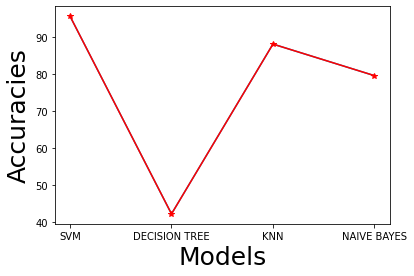

In [56]:
xpoints = ['SVM','DECISION TREE', 'KNN','NAIVE BAYES']
ypoints = [svm_acc,dtree_acc,knn_acc,naivebayes_acc]
ypoints = [i*100 for i in ypoints]
plt.plot(xpoints,ypoints)
plt.xlabel("Models",size=25)
plt.ylabel("Accuracies",size = 25)
plt.plot(ypoints, marker = '*' , color='r')
plt.show()